<a href="https://colab.research.google.com/github/ckraju/kvasu/blob/master/kvasu-fdp-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -U -q PyDrive

In [0]:
zip_id = '1BYDiEbqIDUOn5S2s74wKBf1qTCw_luxD'

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import zipfile, os

In [0]:
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [0]:
if not os.path.exists('tmp'):
    os.makedirs('tmp')


In [7]:
# 2. Download Zip
print ("Downloading zip file")
myzip = drive.CreateFile({'id': zip_id})
myzip.GetContentFile('breeds.zip')

In [8]:
# 3. Unzip
print ("Uncompressing zip file")
zip_ref = zipfile.ZipFile('breeds.zip', 'r')
zip_ref.extractall('tmp/')
zip_ref.close()

Uncompressing zip file


In [10]:
rock_dir = os.path.join('tmp/breeds/train/boston')
paper_dir = os.path.join('tmp/breeds/train/bullmastiff')
scissors_dir = os.path.join('tmp/breeds/train/chow')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 181
total training paper images: 155
total training scissors images: 196
['n02096585_2379-1.jpg', 'n02096585_2379-35.jpg', 'n02096585_2379-100.jpg', 'n02096585_2379-95.jpg', 'n02096585_2379-156.jpg', 'n02096585_2379-147.jpg', 'n02096585_2379-39.jpg', 'n02096585_2379-59.jpg', 'n02096585_2379-84.jpg', 'n02096585_2379-2.jpg']
['n02108422_1445-139.jpg', 'n02108422_1445-29.jpg', 'n02108422_1445-149.jpg', 'n02108422_1445-92.jpg', 'n02108422_1445-131.jpg', 'n02108422_1445-67.jpg', 'n02108422_1445-133.jpg', 'n02108422_1445-35.jpg', 'n02108422_1445-134.jpg', 'n02108422_1445-127.jpg']
['n02112137_6709-144.jpg', 'n02112137_6709-91.jpg', 'n02112137_6709-10.jpg', 'n02112137_6709-162.jpg', 'n02112137_6709-138.jpg', 'n02112137_6709-93.jpg', 'n02112137_6709-192.jpg', 'n02112137_6709-104.jpg', 'n02112137_6709-174.jpg', 'n02112137_6709-14.jpg']


(300, 300, 3)


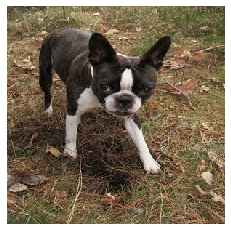

(300, 300, 3)


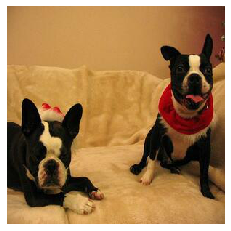

(300, 300, 3)


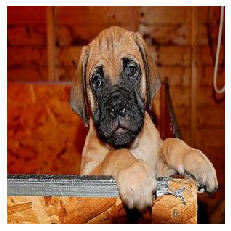

(300, 300, 3)


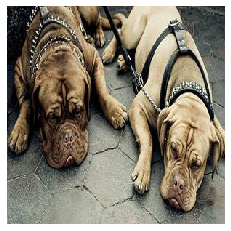

(300, 300, 3)


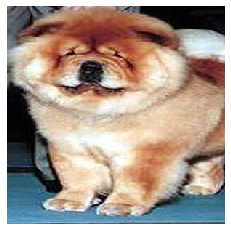

(300, 300, 3)


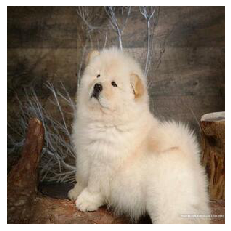

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  print (img.shape)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [12]:
# Over to test data for validation
rock_dir = os.path.join('tmp/breeds/test/boston')
paper_dir = os.path.join('tmp/breeds/test/bullmastiff')
scissors_dir = os.path.join('tmp/breeds/test/chow')

print('total testing rock images:', len(os.listdir(rock_dir)))
print('total testing paper images:', len(os.listdir(paper_dir)))
print('total testing scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total testing rock images: 99
total testing paper images: 99
total testing scissors images: 99
['n02096585_2379-1.jpg', 'n02096585_2379-35.jpg', 'n02096585_2379-95.jpg', 'n02096585_2379-39.jpg', 'n02096585_2379-59.jpg', 'n02096585_2379-84.jpg', 'n02096585_2379-2.jpg', 'n02096585_2379-56.jpg', 'n02096585_2379-12.jpg', 'n02096585_2379-51.jpg']
['n02108422_1445-29.jpg', 'n02108422_1445-92.jpg', 'n02108422_1445-67.jpg', 'n02108422_1445-35.jpg', 'n02108422_1445-87.jpg', 'n02108422_1445-53.jpg', 'n02108422_1445-48.jpg', 'n02108422_1445-56.jpg', 'n02108422_1445-65.jpg', 'n02108422_1445-86.jpg']
['n02112137_6709-91.jpg', 'n02112137_6709-10.jpg', 'n02112137_6709-93.jpg', 'n02112137_6709-14.jpg', 'n02112137_6709-45.jpg', 'n02112137_6709-90.jpg', 'n02112137_6709-66.jpg', 'n02112137_6709-2.jpg', 'n02112137_6709-69.jpg', 'n02112137_6709-85.jpg']


In [13]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [14]:
TRAINING_DIR = "tmp/breeds/train/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "tmp/breeds/test/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

Found 532 images belonging to 3 classes.
Found 297 images belonging to 3 classes.


In [15]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [17]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit_generator(train_generator, epochs=25, validation_data = validation_generator, verbose = 1)

model.save("rps.h5")

Epoch 1/25
17/17 [==============================] - 9s 532ms/step - loss: 1.2878 - acc: 0.3289 - val_loss: 1.0548 - val_acc: 0.5758
Epoch 2/25
17/17 [==============================] - 4s 233ms/step - loss: 1.1658 - acc: 0.4436 - val_loss: 1.0712 - val_acc: 0.5219
Epoch 3/25
17/17 [==============================] - 4s 240ms/step - loss: 1.0920 - acc: 0.4605 - val_loss: 1.0025 - val_acc: 0.4007
Epoch 4/25
17/17 [==============================] - 4s 226ms/step - loss: 1.0109 - acc: 0.5169 - val_loss: 0.9424 - val_acc: 0.5286
Epoch 5/25
17/17 [==============================] - 4s 232ms/step - loss: 1.0153 - acc: 0.5150 - val_loss: 2.0335 - val_acc: 0.3502
Epoch 6/25
17/17 [==============================] - 4s 231ms/step - loss: 0.9924 - acc: 0.5508 - val_loss: 0.8791 - val_acc: 0.5219
Epoch 7/25
17/17 [==============================] - 4s 240ms/step - loss: 0.9175 - acc: 0.5789 - val_loss: 0.7533 - val_acc: 0.6094
Epoch 8/25
17/17 [==============================] - 4s 232ms/step - loss: 0.

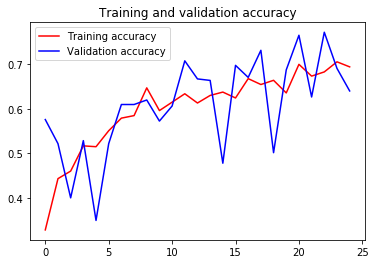

<Figure size 432x288 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()



In [0]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Using TensorFlow backend.


MessageError: ignored